## Nyeregponti approximáció macerás integrálokra

...majd egyszer leírom, addig is ott a jegyzet valakinél...

In [1]:
%pylab inline

class Expr:
    def __init__(self,lhs,rhs,op):
        self.lhs,self.rhs,self.op = lhs,rhs,op
        
    def __add__(self,rhs):
        if type(rhs) == Expr:
            return Expr(self,rhs,'+')
        else:
            return Expr(self,rhs,'+n')
    
    def __radd__(self,lhs):
        return Expr(self,lhs,'+n')
    
    def __sub__(self,rhs):
        if type(rhs) == Expr:
            return self+rhs*(-1)
        else:
            return self+(-rhs)
        
    def __rsub__(self,lhs):
        return lhs+self*(-1)
    
    def __neg__(self):
        return (-1)*self
    
    def __mul__(self,rhs):
        if type(rhs) == Expr:
            return Expr(self,rhs,'*')
        else:
            return Expr(self,rhs,'*n')
    
    def __rmul__(self,lhs):
        return Expr(self,lhs,'*n')
    
    def __truediv__(self,rhs):
        if type(rhs) == Expr:
            return self*rhs**(-1)
        else:
            return self*(1/rhs)
        
    def __rtruediv__(self,lhs):
        return self**(-1)*lhs
    
    def __pow__(self,rhs):
        if type(rhs) == Expr:
            return Expr(self,rhs,'**')
        else:
            return Expr(self,rhs,'**n')
        
    def __rpow__(self,lhs):
        return Expr(lhs,self,'n**')
    
    def __call__(self,x0):
        if self.op == '+':
            return self.lhs(x0) + self.rhs(x0)
        elif self.op == '+n':
            return self.lhs(x0) + self.rhs
        elif self.op == '*':
            return self.lhs(x0) * self.rhs(x0)
        elif self.op == '*n':
            return self.lhs(x0) * self.rhs
        elif self.op == '**':
            return self.lhs(x0)**self.rhs(x0)
        elif self.op == '**n':
            return self.lhs(x0)**self.rhs
        elif self.op == 'n**':
            return self.lhs**self.rhs(x0)
        elif self.op == 'sin':
            return sin(self.lhs(x0))
        elif self.op == 'cos':
            return cos(self.lhs(x0))
        elif self.op == 'log':
            return log(self.lhs(x0))
        elif self.op == 'exp':
            return exp(self.lhs(x0))
        elif self.op == 'id':
            return x0
        elif self.op == 'const':
            return self.lhs
        else:
            raise NotImplementedError
        
    def diff(self):
        if self.op == '+':
            return self.lhs.diff() + self.rhs.diff()
        elif self.op == '+n':
            return self.lhs.diff()
        elif self.op == '*':
            return self.lhs.diff()*self.rhs + self.lhs*self.rhs.diff()
        elif self.op == '*n':
            return self.lhs.diff()*self.rhs
        elif self.op == '**':
            return self.lhs**self.rhs * (self.rhs.diff()*Log(self.lhs) + self.rhs*self.lhs.diff()/self.lhs)
        elif self.op == '**n':
            return self.rhs*self.lhs**(self.rhs-1)*self.lhs.diff()
        elif self.op == 'n**':
            return self.lhs**self.rhs*log(self.lhs)*self.rhs.diff()
        elif self.op == 'sin':
            return Cos(self.lhs)*self.lhs.diff()
        elif self.op == 'cos':
            return -Sin(self.lhs)*self.lhs.diff()
        elif self.op == 'log':
            return self.lhs.diff()/self.lhs
        elif self.op == 'exp':
            return Exp(self.lhs)*self.lhs.diff()
        elif self.op == 'id':
            return Expr(1,None,'const')
        elif self.op == 'const':
            return Expr(0,None,'const')
        else:
            raise NotImplementedError
    
def Sin(x):
    return Expr(x,None,'sin')
def Cos(x):
    return Expr(x,None,'cos')
def Log(x):
    return Expr(x,None,'log')
def Exp(x):
    return Expr(x,None,'exp')
def Sqrt(x):
    return x**0.5
x = Expr(None,None,'id')

Populating the interactive namespace from numpy and matplotlib


In [2]:
def NewtonRaphson(f,x0,max_iters=100):
    df = f.diff()
    it = 0
    while abs(f(x0))>1e-6 and it<max_iters:
        x0 -= f(x0)/df(x0)
        it += 1
    return x0

In [3]:
# Laplace-approximáció
def Laplace(f,x0=1,max_iters=100):
    lf   = Log(f)
    dlf  = lf.diff()
    ddlf = dlf.diff()
    it   = 0
    while abs(dlf(x0))>1e-6 and it<max_iters:
        x0 -= dlf(x0)/ddlf(x0)
        it += 1
    f0 = f(x0)
    s0 = ddlf(x0)
    return f(x0)*Exp(s0*(x-x0)**2/2)

In [4]:
# Integrál közelítése a fentiből (Gauss)
def saddle(f,x0=1,max_iters=100):
    lf   = Log(f)
    dlf  = lf.diff()
    ddlf = dlf.diff()
    it   = 0
    while abs(dlf(x0))>1e-6 and it<max_iters:
        x0 -= dlf(x0)/ddlf(x0)
        it += 1
    f0 = f(x0)
    s0 = ddlf(x0)
    return f0*sqrt(-2*pi/s0)

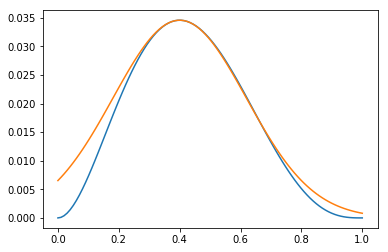

In [5]:
# Laplace-approximáció egy egyszerű függvényre
a,b = 2,3
f = x**a * (1-x)**b
g = Laplace(f,0.5)

t = np.linspace(1e-6,1-1e-6,100)
plot(t,f(t))
plot(t,g(t));

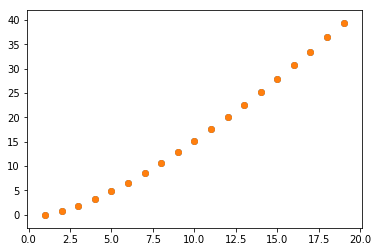

In [6]:
# Nyeregponti approximáció a Gamma-függvényre (Stirling-formula)
def Gamma(n):
    return x**n*Exp(-x)
f = log(cumprod(arange(1,20)))
g = [log(saddle(Gamma(n-1))) for n in range(2,21)]
t = np.arange(1,20)
scatter(t,f)
scatter(t,g);

In [7]:
# Log-gamma függvény közelítése
def lgm(n):
    lf   = (n-1)*Log(x)-x
    dlf  = lf.diff()
    ddlf = dlf.diff()
    x0   = n
    l2p2 = log(2*pi)/2
    while abs(dlf(x0))>1e-12:
        x0 -= dlf(x0)/ddlf(x0)
    return lf(x0) + l2p2 - log(-ddlf(x0))/2

array([[ 0.65180648,  0.69314718],
       [ 1.76408154,  1.79175947],
       [ 3.15726316,  3.17805383],
       [ 4.77084705,  4.78749174],
       [ 6.56537508,  6.57925121],
       [ 8.51326465,  8.52516136],
       [10.59419164, 10.6046029 ],
       [12.79257202, 12.80182748]])

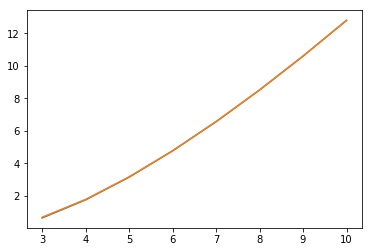

In [8]:
from scipy.special import loggamma
t   = np.linspace(3,10,8)
lg1 = [lgm(n) for n in t]
lg2 = [loggamma(n) for n in t]
plot(t,lg1)
plot(t,lg2);

array([lg1,lg2]).T

In [9]:
# Gamma-függvény (vs. faktoriális)
[exp(lgm(n)) for n in t]

[1.919004351488983,
 5.8362095913458605,
 23.50617513289329,
 118.01916795758994,
 710.078184641933,
 4980.395831612309,
 39902.395452656456,
 359536.87284194736]